In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.ticker as ticker

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

/tmp/ipykernel_634146/3937711748.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


In [12]:
fig_path = 'fig/'
os.makedirs(fig_path, exist_ok=True)

In [13]:
sns.set_style("whitegrid")
# sns.despine(left=True)
sns.set_context("paper", font_scale=2., rc={"lines.linewidth": 3})
# matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['axes.edgecolor'] = '0'
matplotlib.rcParams['lines.markersize'] = 6.5

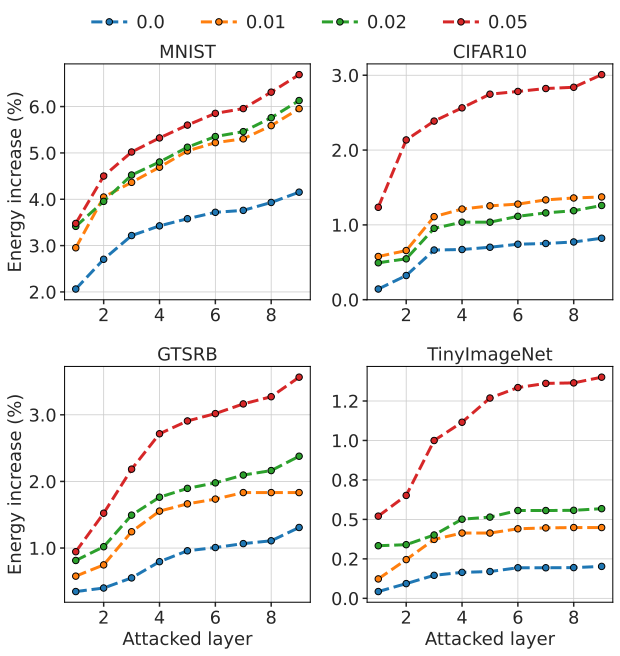

In [14]:
percentages = [0.0, 0.01, 0.02, 0.05]

model = 'resnet18'
datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(2,2, figsize=(9,9))
axs = axs.flatten()

for index, dataset in enumerate(datasets):
    for percentage in percentages:
        name = f'hws_{model}_{dataset}_{percentage}.csv'
        data_file_name = os.path.join(data_path, name)
        df = pd.read_csv(data_file_name)
        original_ratio = df['energy_ratio'][0]
        ratios = (((df['energy_ratio'][1:]/original_ratio)-1)*100)
        axs[index].plot(ratios, label=percentage if index==0 else '', 
                    linestyle="--", marker = 'o', alpha=1,
                    mec= 'black', linewidth=3)
        
        axs[index].tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

        axs[index].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[index].xaxis.set_major_formatter(FormatStrFormatter('%g'))


        # axs[index].yaxis.set_major_locator(ticker.MultipleLocator(0.005))
        # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
        # axs[index].set_xlim([0,len(ratios)+1])
        axs[index].xaxis.set_major_locator(ticker.MultipleLocator(2))
        
        # axs[index].set_ylim([,max(ratios)])
        if index == 0 or index == 2:
            axs[index].set_ylabel('Energy increase (%)', fontsize=18)
        if index == 2 or index == 3:
            axs[index].set_xlabel('Attacked layer', fontsize=18)
        axs[index].set_title(dataset, fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'all_{model}_energy.pdf', bbox_inches='tight')
plt.show()

def export_legend(legend, filename="legend.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
# legend = sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
#                 frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=19)
# export_legend(legend)


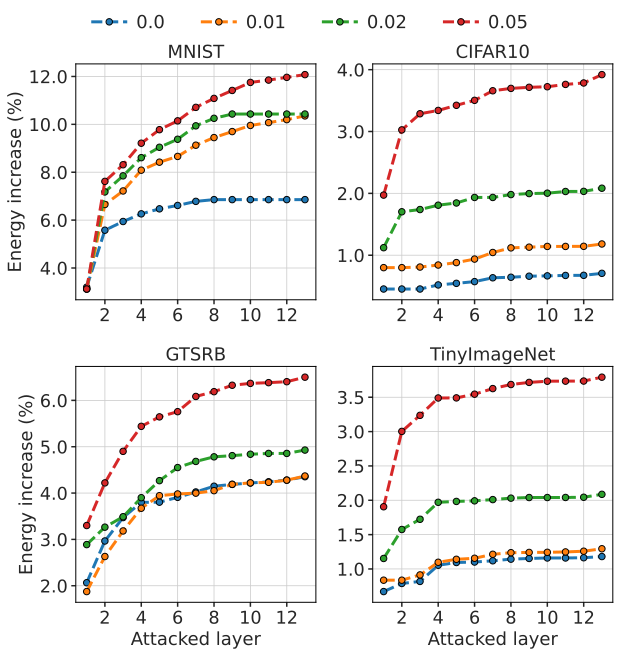

In [15]:
percentages = [0.0, 0.01, 0.02, 0.05]

model = 'VGG16'
datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(2,2, figsize=(9,9))
axs = axs.flatten()

for index, dataset in enumerate(datasets):
    for percentage in percentages:
        name = f'hws_{model}_{dataset}_{percentage}.csv'
        data_file_name = os.path.join(data_path, name)
        df = pd.read_csv(data_file_name)
        original_ratio = df['energy_ratio'][0]
        ratios = (((df['energy_ratio'][1:]/original_ratio)-1)*100)
        axs[index].plot(ratios, label=percentage if index==0 else '', 
                    linestyle="--", marker = 'o', alpha=1,
                    mec= 'black', linewidth=3)
        
        axs[index].tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

        axs[index].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[index].xaxis.set_major_formatter(FormatStrFormatter('%g'))

        if index == 3:
            axs[index].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
        # axs[index].set_xlim([0,len(ratios)+1])
        axs[index].xaxis.set_major_locator(ticker.MultipleLocator(2))
        
        # axs[index].set_ylim([,max(ratios)])
        if index == 0 or index == 2:
            axs[index].set_ylabel('Energy increase (%)', fontsize=18)
        if index == 2 or index == 3:
            axs[index].set_xlabel('Attacked layer', fontsize=18)
        axs[index].set_title(dataset, fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'all_{model}_energy.pdf', bbox_inches='tight')
plt.show()

def export_legend(legend, filename="legend.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
# legend = sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
#                 frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=19)
# export_legend(legend)


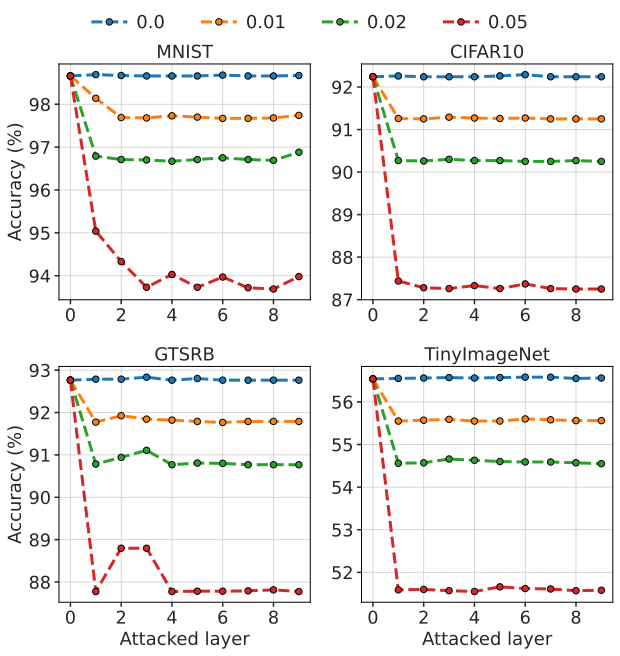

In [16]:
percentages = [0.0, 0.01, 0.02, 0.05]

model = 'resnet18'
datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(2,2, figsize=(9,9))
axs = axs.flatten()

for index, dataset in enumerate(datasets):
    for percentage in percentages:
        name = f'hws_{model}_{dataset}_{percentage}.csv'
        data_file_name = os.path.join(data_path, name)
        df = pd.read_csv(data_file_name)
        accs = df['accuracy']*100
        axs[index].plot(accs, label=percentage if index==0 else '', 
                    linestyle="--", marker = 'o', alpha=1,
                    mec= 'black', linewidth=3)
        
        axs[index].tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

        # axs[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[index].xaxis.set_major_formatter(FormatStrFormatter('%g'))


        axs[index].yaxis.set_major_locator(ticker.MultipleLocator(1))
        # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
        # axs[index].set_xlim([0,len(ratios)+1])
        axs[index].xaxis.set_major_locator(ticker.MultipleLocator(2))
        
        # axs[index].set_ylim([,max(ratios)])
        if index == 0 or index == 2:
            axs[index].set_ylabel('Accuracy (%)', fontsize=18)
        if index == 2 or index == 3:
            axs[index].set_xlabel('Attacked layer', fontsize=18)
        axs[index].set_title(dataset, fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'all_{model}_acc.pdf', bbox_inches='tight')
plt.show()


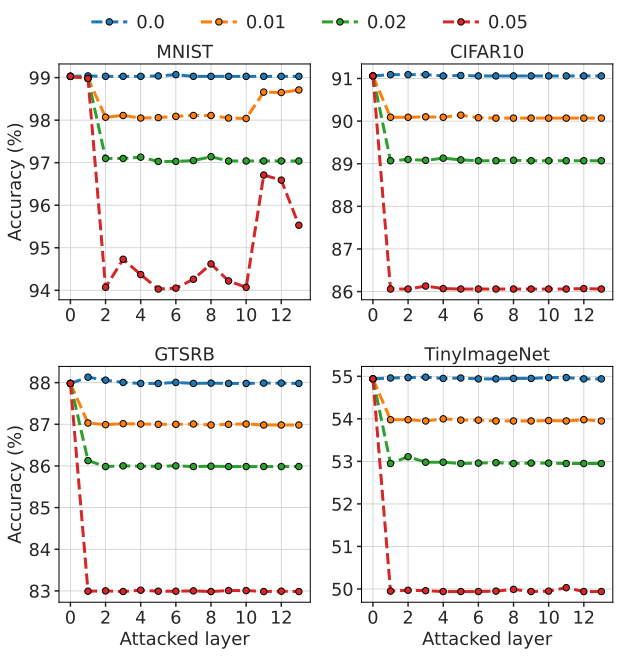

In [17]:
percentages = [0.0, 0.01, 0.02, 0.05]

model = 'VGG16'
datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(2,2, figsize=(9,9))
axs = axs.flatten()

for index, dataset in enumerate(datasets):
    for percentage in percentages:
        name = f'hws_{model}_{dataset}_{percentage}.csv'
        data_file_name = os.path.join(data_path, name)
        df = pd.read_csv(data_file_name)
        accs = df['accuracy']*100
        axs[index].plot(accs, label=percentage if index==0 else '', 
                    linestyle="--", marker = 'o', alpha=1,
                    mec= 'black', linewidth=3)
        
        axs[index].tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

        # axs[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[index].xaxis.set_major_formatter(FormatStrFormatter('%g'))


        axs[index].yaxis.set_major_locator(ticker.MultipleLocator(1))
        # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
        # axs[index].set_xlim([0,len(ratios)+1])
        axs[index].xaxis.set_major_locator(ticker.MultipleLocator(2))
        
        # axs[index].set_ylim([,max(ratios)])
        if index == 0 or index == 2:
            axs[index].set_ylabel('Accuracy (%)', fontsize=18)
        if index == 2 or index == 3:
            axs[index].set_xlabel('Attacked layer', fontsize=18)
        axs[index].set_title(dataset, fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'all_{model}_acc.pdf', bbox_inches='tight')
plt.show()


In [18]:
# percentages = [0.0, 0.01, 0.02, 0.05]

# model = 'VGG16'
# datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

# data_path = os.path.join('slurm_jobs/results', model)

# marker_ds = ['s', 'o', '>']
# palette = sns.color_palette("hls",7) 
# idx_0, idx_1 = (0, 4)
# color = [palette[idx_0], palette[idx_1]]

# fig, axs = plt.subplots(1,4, figsize=(18,5))
# axs = axs.flatten()

# for index, dataset in enumerate(datasets):
#     for percentage in percentages:
#         name = f'hws_{model}_{dataset}_{percentage}.csv'
#         data_file_name = os.path.join(data_path, name)
#         df = pd.read_csv(data_file_name)
#         accs = df['accuracy']*100
#         axs[index].plot(accs, label=percentage if index==0 else '', 
#                     linestyle="--", marker = 'o', alpha=1,
#                     ms= '9', mec= 'black', linewidth=3)
        
#         axs[index].tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

#         # axs[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#         axs[index].xaxis.set_major_formatter(FormatStrFormatter('%g'))


#         # axs[index].yaxis.set_major_locator(ticker.MultipleLocator(0.005))
#         axs[index].yaxis.set_major_locator(ticker.AutoLocator())
#         # axs[index].set_xlim([0,len(ratios)+1])
#         axs[index].xaxis.set_major_locator(ticker.MultipleLocator(2))
        
#         # axs[index].set_ylim([,max(ratios)])
#         if index == 0:
#             axs[index].set_ylabel('Accuracy (%)', fontsize=22)
#         axs[index].set_xlabel('Attacked layer', fontsize=22)
#         # axs[index].set_title(dataset)

# # fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
# plt.grid(True)

# # sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
#                 # frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=19)

# fig.tight_layout() 
# plt.savefig(f'all_{model}_acc.pdf', bbox_inches='tight')
# plt.show()


In [19]:
# model = 'VGG16'
# datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

# data_path = os.path.join('slurm_jobs/results', model)

# for index, dataset in enumerate(datasets):
#     name = f'hws_{model}_{dataset}_0.05.csv'
#     data_file_name = os.path.join(data_path, name)
#     df = pd.read_csv(data_file_name)
#     original_ratio = df['energy_ratio'][0]
#     # print("%.2f" % df['accuracy'].iloc[0])
#     # ratios = df['energy_ratio'].iloc[-1]/original_ratio
#     # print("%.3f" % ratios)
#     # print("%.2f" % df['accuracy'].iloc[-1])

In [20]:
df

,layer,accuracy,energy_ratio,energy_pj
0,original,0.5494,0.670511,6.091331e+12
1,batchnorm2d_1,0.4995,0.683288,6.207363e+12
2,batchnorm2d_4,0.4997,0.690643,6.274192e+12
3,batchnorm2d_8,0.4996,0.692212,6.288428e+12
4,batchnorm2d_11,0.4994,0.693906,6.303827e+12
5,batchnorm2d_15,0.4994,0.693916,6.303917e+12
6,batchnorm2d_18,0.4994,0.694276,6.307192e+12
7,batchnorm2d_21,0.4995,0.694824,6.312171e+12
8,batchnorm2d_25,0.4999,0.695221,6.315770e+12
9,batchnorm2d_28,0.4994,0.695426,6.317636e+12


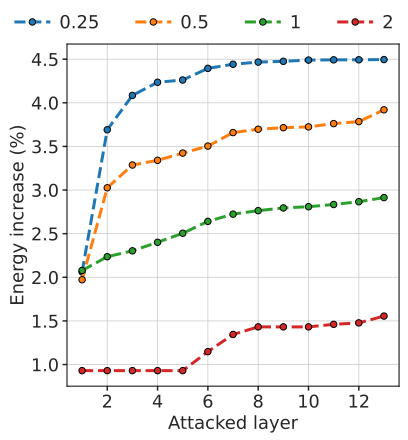

In [33]:
percentages = [0.25, 0.5, 1, 2]

model = 'VGG16'
datasets = ['MNIST','CIFAR10','GTSRB','TinyImageNet']

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(1,1, figsize=(6,6))
# axs = axs.flatten()

for percentage in percentages:
    name = f'hws_{model}_CIFAR10_0.05_{percentage}.csv'
    data_file_name = os.path.join(data_path, name)
    df = pd.read_csv(data_file_name)
    original_ratio = df['energy_ratio'][0]
    ratios = (((df['energy_ratio'][1:]/original_ratio)-1)*100)
    axs.plot(ratios, label=percentage, 
                linestyle="--", marker = 'o', alpha=1,
                mec= 'black', linewidth=3)
        
    axs.tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

    axs.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%g'))

    axs.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
    # axs[index].set_xlim([0,len(ratios)+1])
    axs.xaxis.set_major_locator(ticker.MultipleLocator(2))
        
    axs.set_ylabel('Energy increase (%)', fontsize=18)
    axs.set_xlabel('Attacked layer', fontsize=18)
    # axs.set_title(dataset, fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'stepsize_vgg_cifar.pdf', bbox_inches='tight')
plt.show()


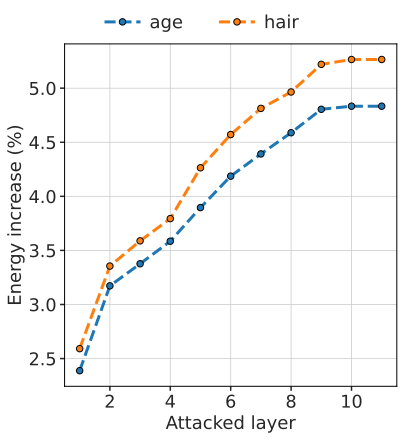

In [32]:
percentages = ['age','hair']

model = 'VGG16'

data_path = os.path.join('slurm_jobs/results', model)

marker_ds = ['s', 'o', '>']
palette = sns.color_palette("hls",7) 
idx_0, idx_1 = (0, 4)
color = [palette[idx_0], palette[idx_1]]

fig, axs = plt.subplots(1,1, figsize=(6,6))
# axs = axs.flatten()

for percentage in percentages:
    name = f'gan_{percentage}.csv'
    data_file_name = os.path.join(data_path, name)
    df = pd.read_csv(data_file_name)
    original_ratio = df['energy_ratio'][0]
    ratios = (((df['energy_ratio'][1:]/original_ratio)-1)*100)
    axs.plot(ratios, label=percentage, 
                linestyle="--", marker = 'o', alpha=1,
                mec= 'black', linewidth=3)
        
    axs.tick_params(left=True, bottom=True, direction='out', which='major', width=1.5, length=4.5)

    axs.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%g'))

    axs.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    # axs[index].yaxis.set_major_locator(ticker.AutoLocator())
    # axs[index].set_xlim([0,len(ratios)+1])
    axs.xaxis.set_major_locator(ticker.MultipleLocator(2))
        
    axs.set_ylabel('Energy increase (%)', fontsize=18)
    axs.set_xlabel('Attacked layer', fontsize=18)
    # axs.set_title('SpongeNet StarGAN', fontsize=18)

fig.legend(labelspacing=.1, handletextpad=0.1, fontsize=26)
plt.grid(True)

sns.move_legend(fig, "center", bbox_to_anchor=(.5, 1.0), ncol=4, title=None, 
                frameon=False, labelspacing=-0, handletextpad=0.5, fontsize=18)

fig.tight_layout() 
plt.savefig(f'spongenet_gan_energy.pdf', bbox_inches='tight')
plt.show()
